In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Group_6_data_cleaned.csv",index_col=0)
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
print(df.describe())
print(df.info())

               SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
count  1353.000000  1353.000000     1353.000000  1353.000000    1353.000000   
mean      0.237990    -0.258684        0.327421    -0.223208      -0.025129   
std       0.916389     0.679072        0.822193     0.799682       0.936262   
min      -1.000000    -1.000000       -1.000000    -1.000000      -1.000000   
25%      -1.000000    -1.000000        0.000000    -1.000000      -1.000000   
50%       1.000000     0.000000        1.000000     0.000000       0.000000   
75%       1.000000     0.000000        1.000000     0.000000       1.000000   
max       1.000000     1.000000        1.000000     1.000000       1.000000   

       web_traffic   URL_Length  age_of_domain  having_IP_Address       Result  
count  1353.000000  1353.000000    1353.000000        1353.000000  1353.000000  
mean      0.000000    -0.053215       0.219512           0.114560    -0.113821  
std       0.806776     0.762552       0.97597

In [5]:
X = df.drop(['Result'],axis=1)

y = df['Result']

In [6]:
inertia = []

for k in range(1,16):
    km = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)
inertia

[7813.7339246119745,
 6026.4244645412155,
 5101.108231346597,
 4601.302798483032,
 4155.1088740813275,
 3837.0549389339853,
 3548.48508827306,
 3343.63915112522,
 3201.8924823433276,
 3032.788094193455,
 2913.350200554384,
 2822.421919994352,
 2731.954522014852,
 2685.0011447837264,
 2611.1779247161244]

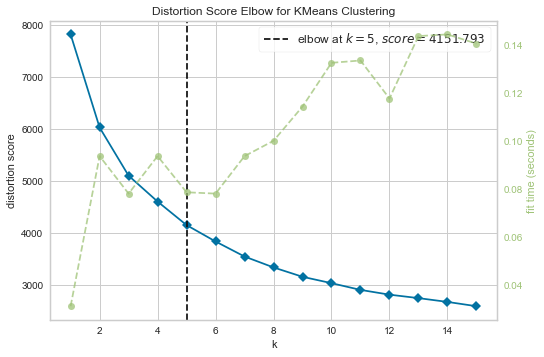

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from  yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,16))

visualizer.fit(X)
visualizer.show()

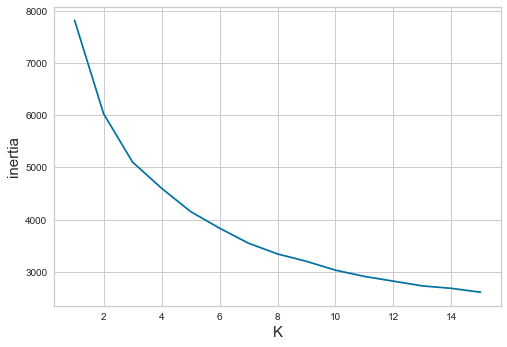

In [8]:
plt.plot(range(1,16), inertia)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

In [9]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=1000, n_init=10).fit(X)

In [10]:
cluster = kmeans.predict(X)
cluster

array([2, 4, 2, ..., 1, 0, 3])

In [11]:
df['Cluster'] = cluster
df

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result,Cluster
0,1,-1,1,-1,-1,1,1,1,0,0,2
1,-1,-1,-1,-1,-1,0,1,1,1,1,4
2,1,-1,0,0,-1,0,-1,1,0,1,2
3,1,0,1,-1,-1,0,1,1,0,0,2
4,-1,-1,1,-1,0,0,-1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1,4
1349,-1,0,1,0,-1,0,0,1,0,-1,4
1350,-1,0,-1,-1,-1,0,-1,-1,0,1,1
1351,0,0,1,0,0,0,-1,1,0,1,0


In [12]:
kmeans.labels_

array([2, 4, 2, ..., 1, 0, 3])

In [13]:
kmeans.cluster_centers_

array([[ 0.80243902, -0.06829268,  0.58780488,  0.12439024,  0.85365854,
        -0.55365854,  0.08536585,  1.        ,  0.15121951],
       [-0.73553719, -0.66115702, -0.12809917, -0.59917355, -0.60743802,
         0.67768595, -0.42975207, -1.        ,  0.04958678],
       [ 1.        , -0.06077348,  0.71823204, -0.43093923, -0.96685083,
        -0.4640884 , -0.01657459,  1.        ,  0.11049724],
       [ 0.71678322, -0.03846154,  0.31818182, -0.0034965 ,  0.31818182,
         0.6993007 ,  0.13286713, -1.        ,  0.13986014],
       [-0.91880342, -0.5982906 ,  0.05128205, -0.55128205, -0.65384615,
        -0.22649573, -0.16239316,  1.        ,  0.08974359]])

In [15]:
kmeans.transform(X)

# measures the distance from each instance to every centroid
# this can be used as a transformation from a high dimensional space to a lower dimensional space

array([[3.00842066, 3.29618182, 2.11557487, 3.01034331, 2.81565562],
       [3.63343011, 2.94388645, 3.19365213, 3.78429757, 1.95585083],
       [2.49230225, 2.90574035, 1.66719058, 2.93863802, 2.24287331],
       ...,
       [3.99778716, 1.53913833, 3.53208961, 3.03463672, 2.55965783],
       [1.7521721 , 2.78668997, 1.84345029, 2.62170854, 1.89593862],
       [2.55129996, 3.26342436, 3.34572699, 1.95202935, 3.85258958]])

In [16]:
kmeans.inertia_

4155.964852029901

In [17]:
kmeans.score(X)

-4155.964852029901

In [18]:
silhouette_samples(X, kmeans.labels_)

array([ 0.22658614,  0.24664865,  0.22624936, ...,  0.27658456,
       -0.06235122,  0.13933385])

In [19]:
silhouette_score(X, kmeans.labels_)

0.19977879112360433

Text(0, 0.5, 'Silhouette Score')

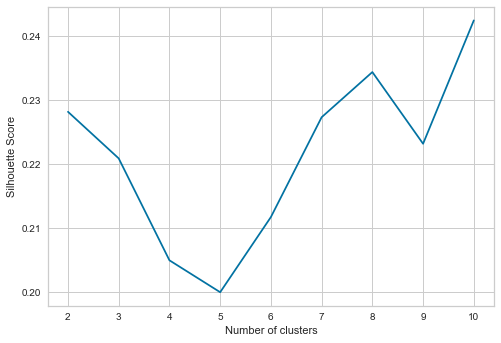

In [20]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    km = KMeans(n_clusters = k).fit(X)
    sil.append(silhouette_score(X, km.labels_, metric = 'euclidean'))
    
plt.plot(range(2,11),sil)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

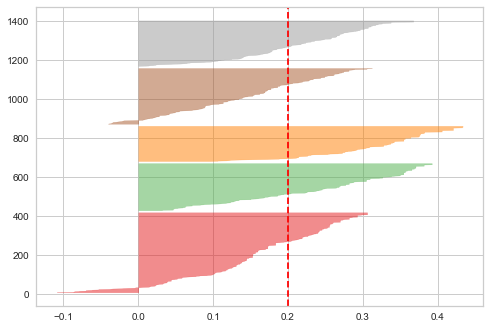

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X);

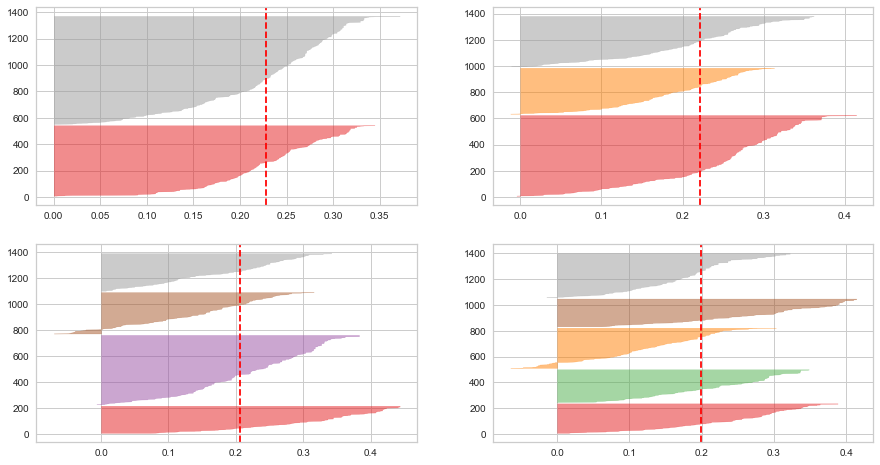

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(2,6):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(X)

# PCA

In [23]:
from sklearn.decomposition import PCA

pca_=PCA(n_components=2,random_state=0)
pca_.fit(X)
pca_xnorm=pca_.transform(X)

Text(0.5, 0, 'PCA Comp 2')

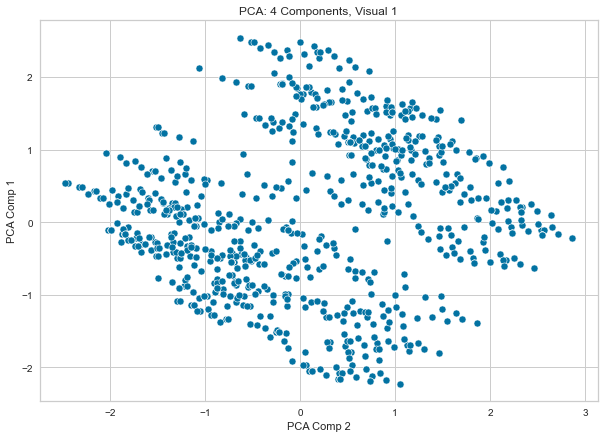

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_xnorm[:,0],y=pca_xnorm[:,1],s=50)
plt.title('PCA: 4 Components, Visual 1') #title
plt.ylabel('PCA Comp 1') #x label
plt.xlabel('PCA Comp 2') #y label

Text(0, 0.5, 'PC 2')

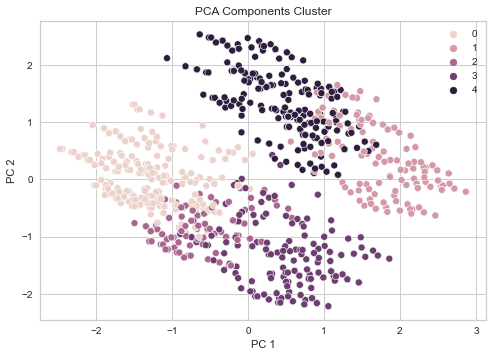

In [26]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=1000, n_init=10).fit(X)
sns.scatterplot(data = pca_xnorm, x=pca_xnorm[:,0],y=pca_xnorm[:,1],hue=kmeans.labels_)
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('PC 1')
# Set y-axis label
plt.ylabel('PC 2')

In [27]:
print(X.head)

<bound method NDFrame.head of       SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0       1           -1               1           -1             -1   
1      -1           -1              -1           -1             -1   
2       1           -1               0            0             -1   
3       1            0               1           -1             -1   
4      -1           -1               1           -1              0   
...   ...          ...             ...          ...            ...   
1348   -1           -1              -1           -1             -1   
1349   -1            0               1            0             -1   
1350   -1            0              -1           -1             -1   
1351    0            0               1            0              0   
1352    1            0               1            1              1   

      web_traffic  URL_Length  age_of_domain  having_IP_Address  
0               1           1              1                  0